In [ ]:
!pip install qiskit qiskit-aer matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 63.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 101.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 77.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 11.0 MB/s eta 0:00:00


In [ ]:
!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=856f4354824bd909e0e5c5734f199871df9f1c0d6fe220c6469eaf646880406d
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc


In [ ]:
import qiskit_aer
from qiskit_aer import Aer
backend = Aer.get_backend("qasm_simulator")
backend

QasmSimulator('qasm_simulator')

In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

def deutsch_jozsa(oracle_circuit,n):
    qc = QuantumCircuit(n + 1, n)
    qc.x(n)
    for i in range(n+1):
      qc.h(i)
    qc.append(oracle_circuit.to_gate(),range(n+1))
    for i in range(n+1):

       qc.h(i)
    for i in range(n):
      qc.measure(i,i)

    return qc


In [ ]:
def constant_oracle():
  oracle = QuantumCircuit(3)
  oracle.x(2) #deliberately written .x at qubit 2  just to understand the affect of qubit 2
  return oracle

def balanced_oracle():#XOR GATE
    oracle = QuantumCircuit(3)
    oracle.cx(0, 2)
    oracle.cx(1, 2)
    return oracle


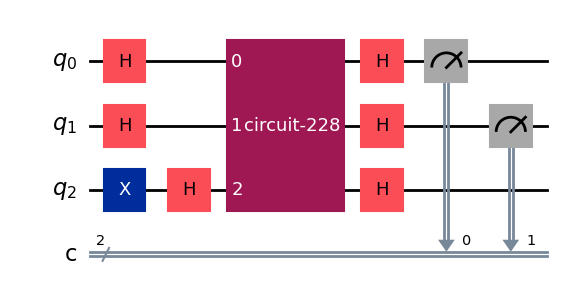

In [ ]:
oracle = constant_oracle()
dj_circuit = deutsch_jozsa(oracle,2)
dj_circuit.draw("mpl")

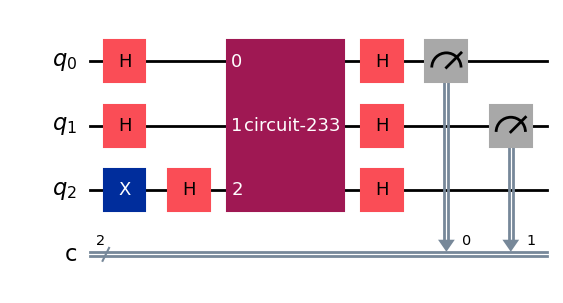

In [ ]:
oracle_1 = balanced_oracle()
dj_circuit_1 = deutsch_jozsa(oracle_1,2)
dj_circuit_1.draw("mpl")

Measurement results: {'00': 1024}


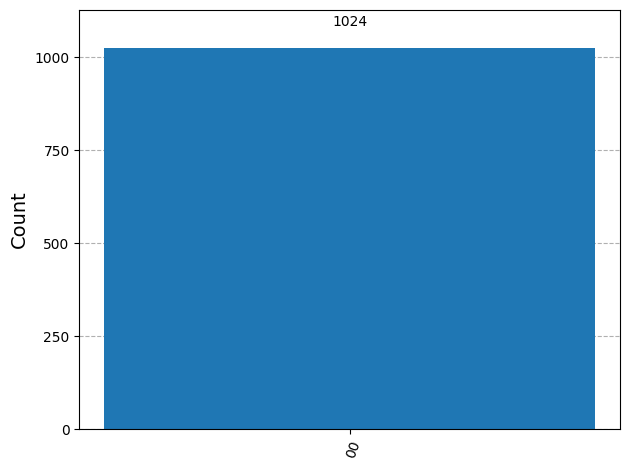

In [ ]:
compiled_circuit = transpile(dj_circuit, backend)

job = backend.run(compiled_circuit, shots=1024)#again 1024 shots and measuring the counts


result = job.result()
counts = result.get_counts()


print("Measurement results:", counts)
hist = plot_histogram(counts)
hist.savefig("plot_constant.png")
hist

In [ ]:

if '00' in counts:
    print("Function is Constant")
else:
    print("Function is Balanced")

Function is CONSTANT


Measurement results: {'11': 1024}
Function is Balanced


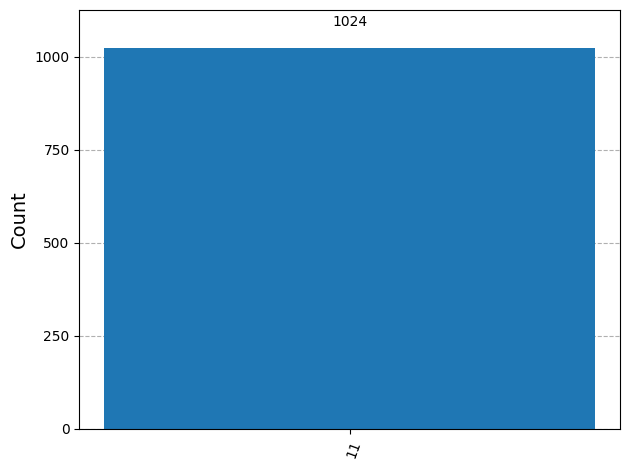

In [ ]:
compiled_circuit = transpile(dj_circuit_1, backend)

job = backend.run(compiled_circuit, shots=1024)

result = job.result()
counts = result.get_counts()

print("Measurement results:", counts)
plot_histogram(counts)
plt.show()
hist = plot_histogram(counts)
hist.savefig("plot_balanced.png")

if '00' in counts:
    print("Function is Constant")
else:
    print("Function is Balanced")
hist